In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler,RobustScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsRegressor

In [23]:
df=pd.read_csv('C:/Users/USER/DA/DATA SETS/Cancer_Rates.csv')

In [24]:
df.head()

,FID,ZIP,Colorectal,Lung_Bronc,Breast_Can,Prostate_C,Urinary_Sy,All_Cancer,SHAPE_Length,SHAPE_Area
0,1,60002,218.062127,419.666735,399.094836,259.205925,259.205925,2703.147501,215525.155184,1.149062e+09
1,2,60010,258.915706,335.464697,504.322767,499.819885,227.395533,3248.829251,178637.109618,8.027354e+08
2,3,60015,153.435867,230.153801,478.573777,442.041428,222.847331,2922.587952,111400.890558,3.674576e+08
3,4,60020,292.797189,507.515128,214.717939,302.557095,370.876440,3084.130392,92363.084625,1.666177e+08
4,5,60030,221.535432,284.440555,404.780789,322.730629,210.595411,2581.845035,247258.224672,8.455179e+08


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FID           27 non-null     int64  
 1   ZIP           27 non-null     int64  
 2   Colorectal    27 non-null     float64
 3   Lung_Bronc    27 non-null     float64
 4   Breast_Can    27 non-null     float64
 5   Prostate_C    27 non-null     float64
 6   Urinary_Sy    27 non-null     float64
 7   All_Cancer    27 non-null     float64
 8   SHAPE_Length  27 non-null     float64
 9   SHAPE_Area    27 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 2.2 KB


In [26]:
df.isnull().sum()

FID             0
ZIP             0
Colorectal      0
Lung_Bronc      0
Breast_Can      0
Prostate_C      0
Urinary_Sy      0
All_Cancer      0
SHAPE_Length    0
SHAPE_Area      0
dtype: int64

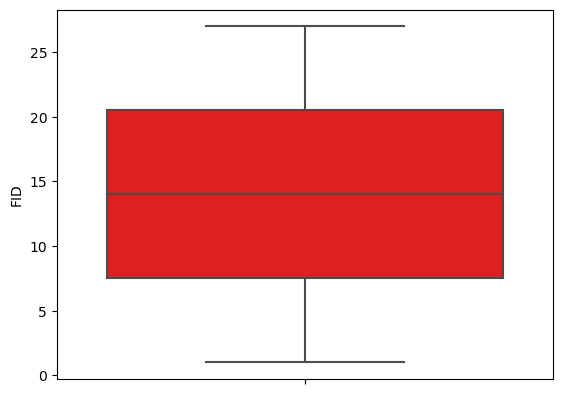

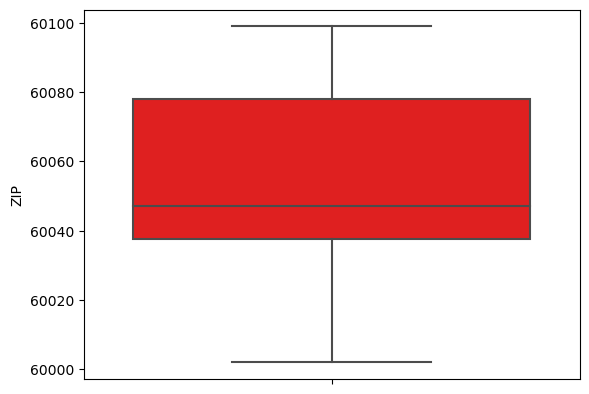

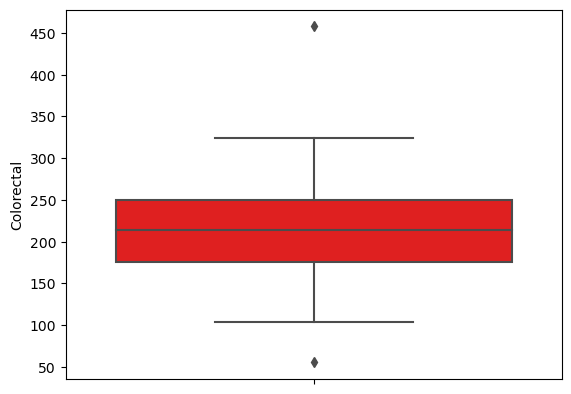

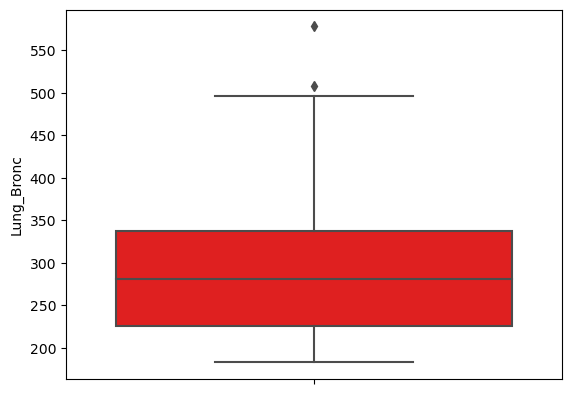

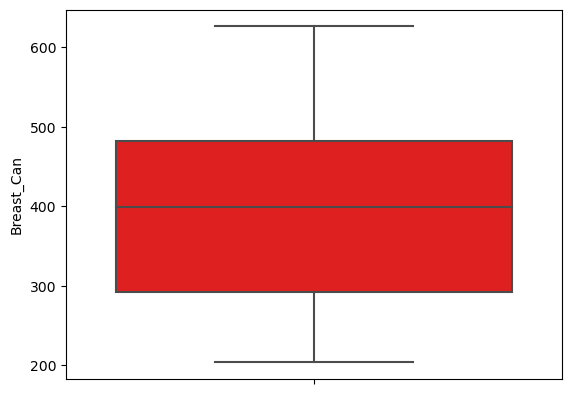

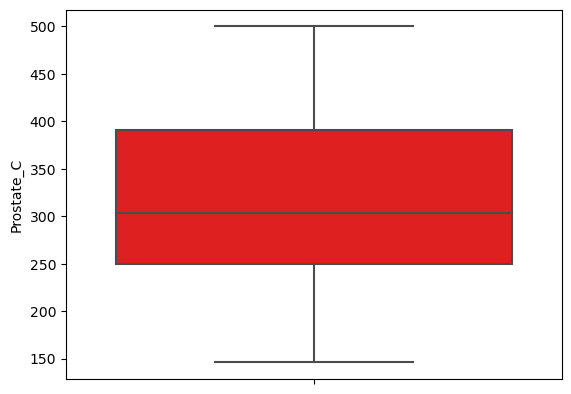

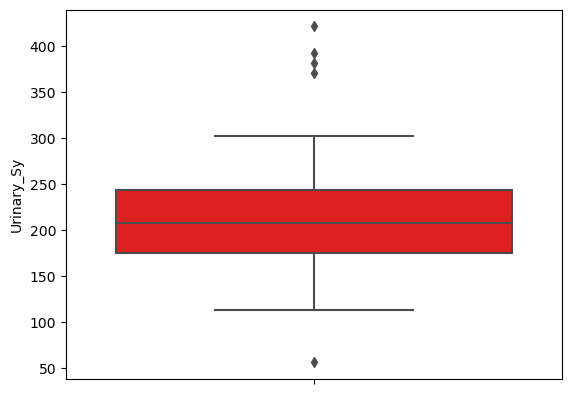

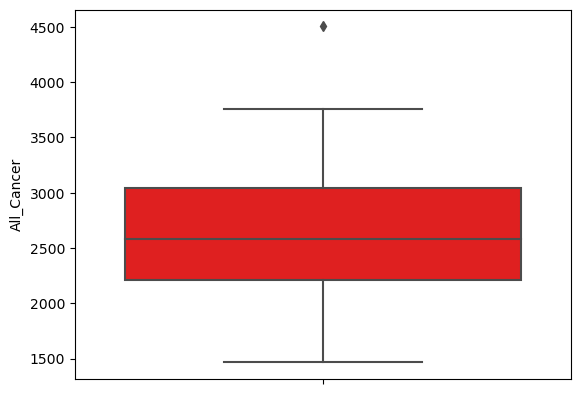

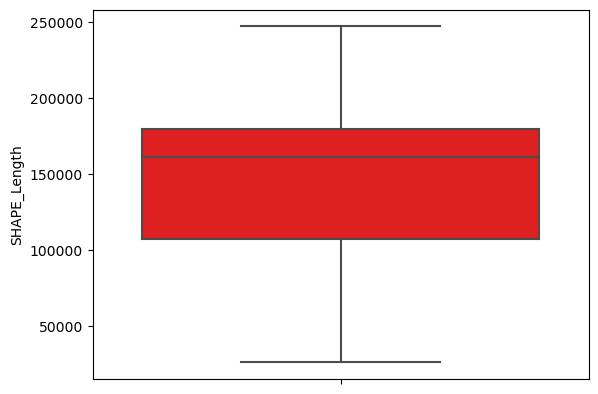

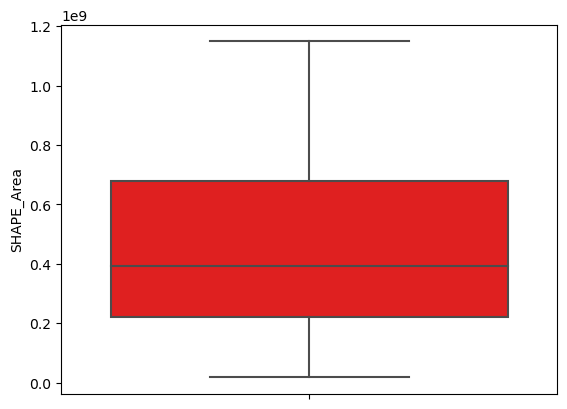

In [27]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.boxplot(y=df[i],color="red")
        plt.show()

In [28]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL

In [29]:
for column in df.columns:
    if df[column].dtype != "object":
        UL, LL = outlier_limit(df[column])
        df[column] = np.where((df[column]>UL) | (df[column]<LL),np.nan,df[column])

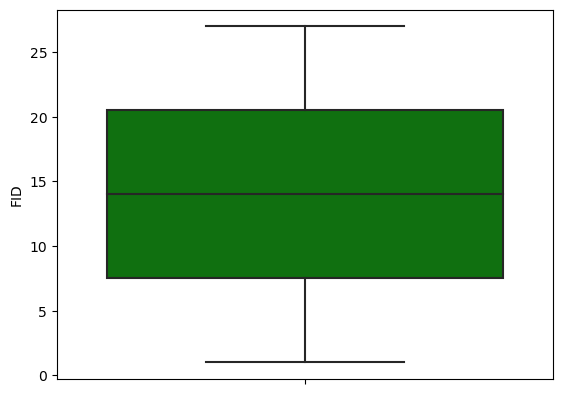

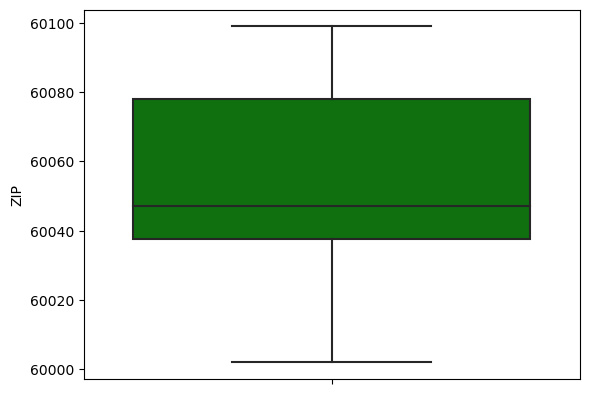

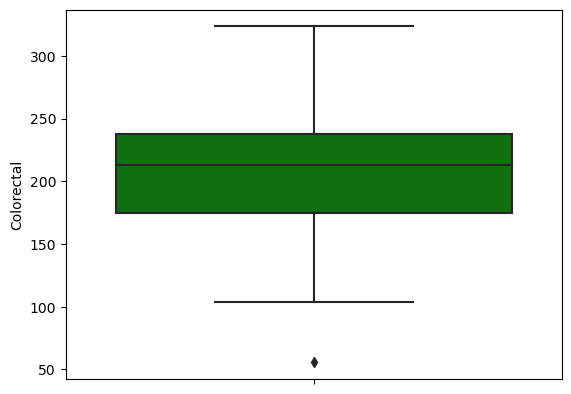

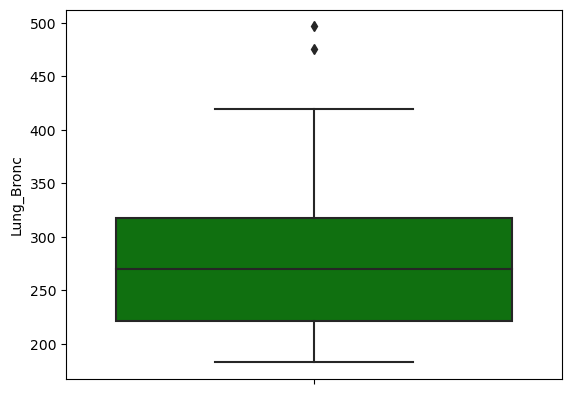

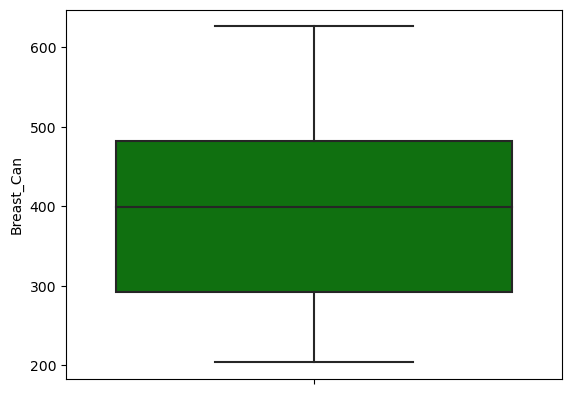

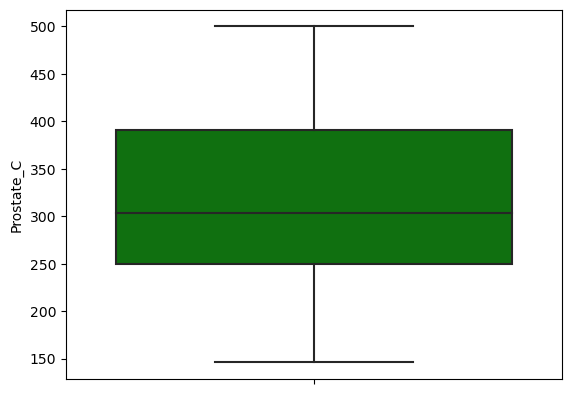

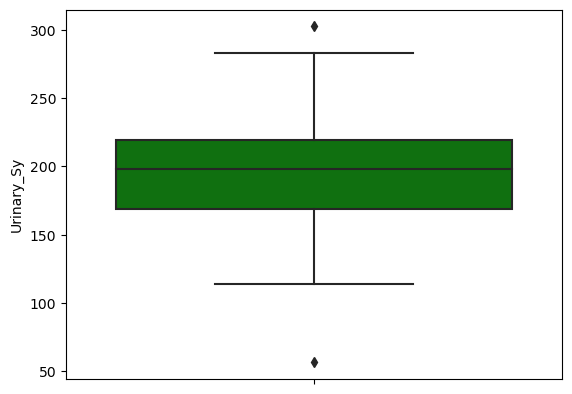

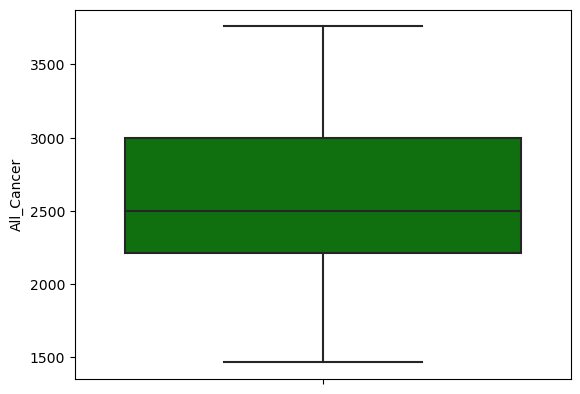

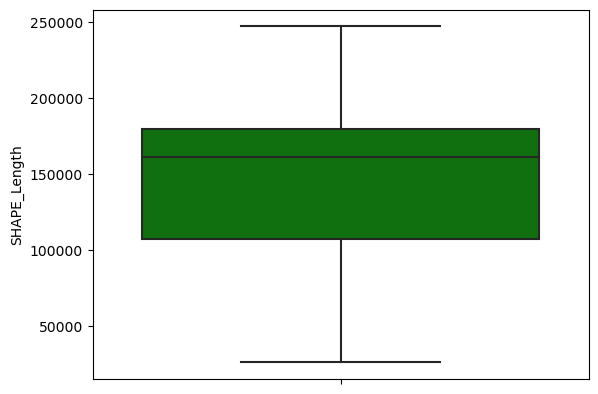

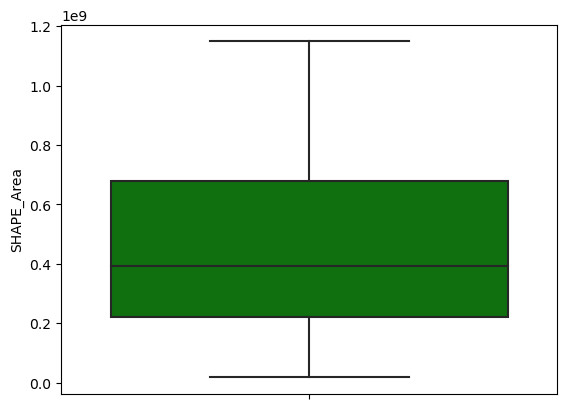

In [30]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.boxplot(y=df[i],color="g")
        plt.show()

In [31]:
df.isnull().sum()

FID             0
ZIP             0
Colorectal      1
Lung_Bronc      2
Breast_Can      0
Prostate_C      0
Urinary_Sy      4
All_Cancer      1
SHAPE_Length    0
SHAPE_Area      0
dtype: int64

In [32]:
df=df.dropna()

In [33]:
df.shape

(23, 10)

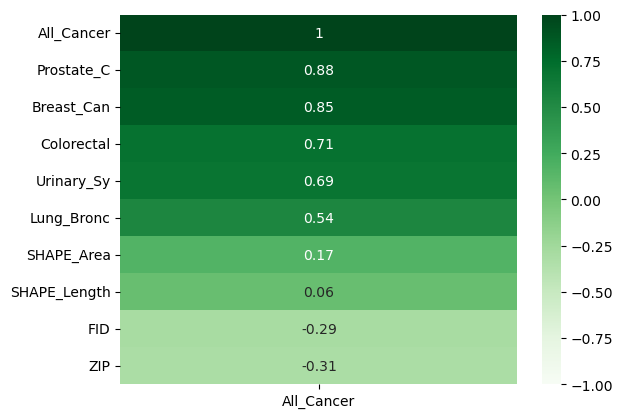

In [36]:
sns.heatmap(df.corr()[["All_Cancer"]].sort_values(by="All_Cancer", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Greens");

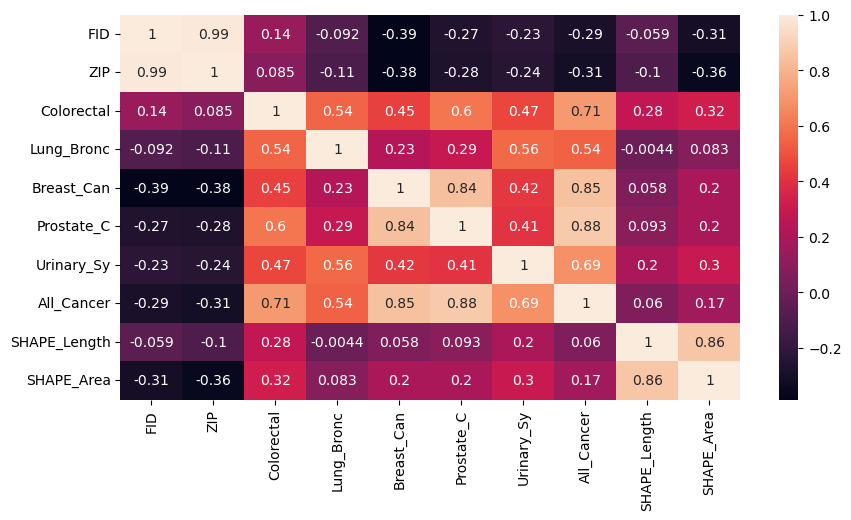

In [37]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 25
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FID           23 non-null     float64
 1   ZIP           23 non-null     float64
 2   Colorectal    23 non-null     float64
 3   Lung_Bronc    23 non-null     float64
 4   Breast_Can    23 non-null     float64
 5   Prostate_C    23 non-null     float64
 6   Urinary_Sy    23 non-null     float64
 7   All_Cancer    23 non-null     float64
 8   SHAPE_Length  23 non-null     float64
 9   SHAPE_Area    23 non-null     float64
dtypes: float64(10)
memory usage: 2.0 KB


In [39]:
x=df[["Urinary_Sy","Prostate_C","Breast_Can","Colorectal","Lung_Bronc"]].values
y=df[["All_Cancer"]].values

In [40]:
rs=RobustScaler()

In [41]:
x=rs.fit_transform(x)

In [42]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "KNeighborsRegressor":KNeighborsRegressor()
}

In [43]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  126.89310616455775
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  127.23694870121842
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  124.97364995325022
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  302.71479553317346
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  241.7970914219713
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  272.8762064238448
************************************************

In [44]:
rd=Ridge()

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [46]:
rd.fit(x_train, y_train)

Ridge()

In [47]:
print("model trained with {}".format(rd))
training_score = rd.score(x_train, y_train)*100
testing_score = rd.score(x_test, y_test)*100
score = r2_score(y_test, rd.predict(x_test))*100
mae = mean_absolute_error(y_test, rd.predict(x_test))
mse = mean_squared_error(y_test, rd.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

model trained with Ridge()
r2score:  90.94412640991314
training_score:  95.29708388641829
testing_score:  90.94412640991314
mae:  116.27302088985076
mse:  18402.104841429657
rmse_test:  135.65435798908067


In [48]:
y_pred = rd.predict(x)

In [49]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
OUTPUT

,ACTUAL,PREDICTED
0,2703.147501,2703.908863
1,3248.829251,3227.007993
2,2922.587952,2859.428900
3,2581.845035,2599.442665
4,2217.827004,2297.271362
5,1796.296296,1798.498332
6,2267.414680,2160.661794
7,3149.850253,2818.699520
8,3611.815169,3567.819389
9,2340.858889,2384.575885


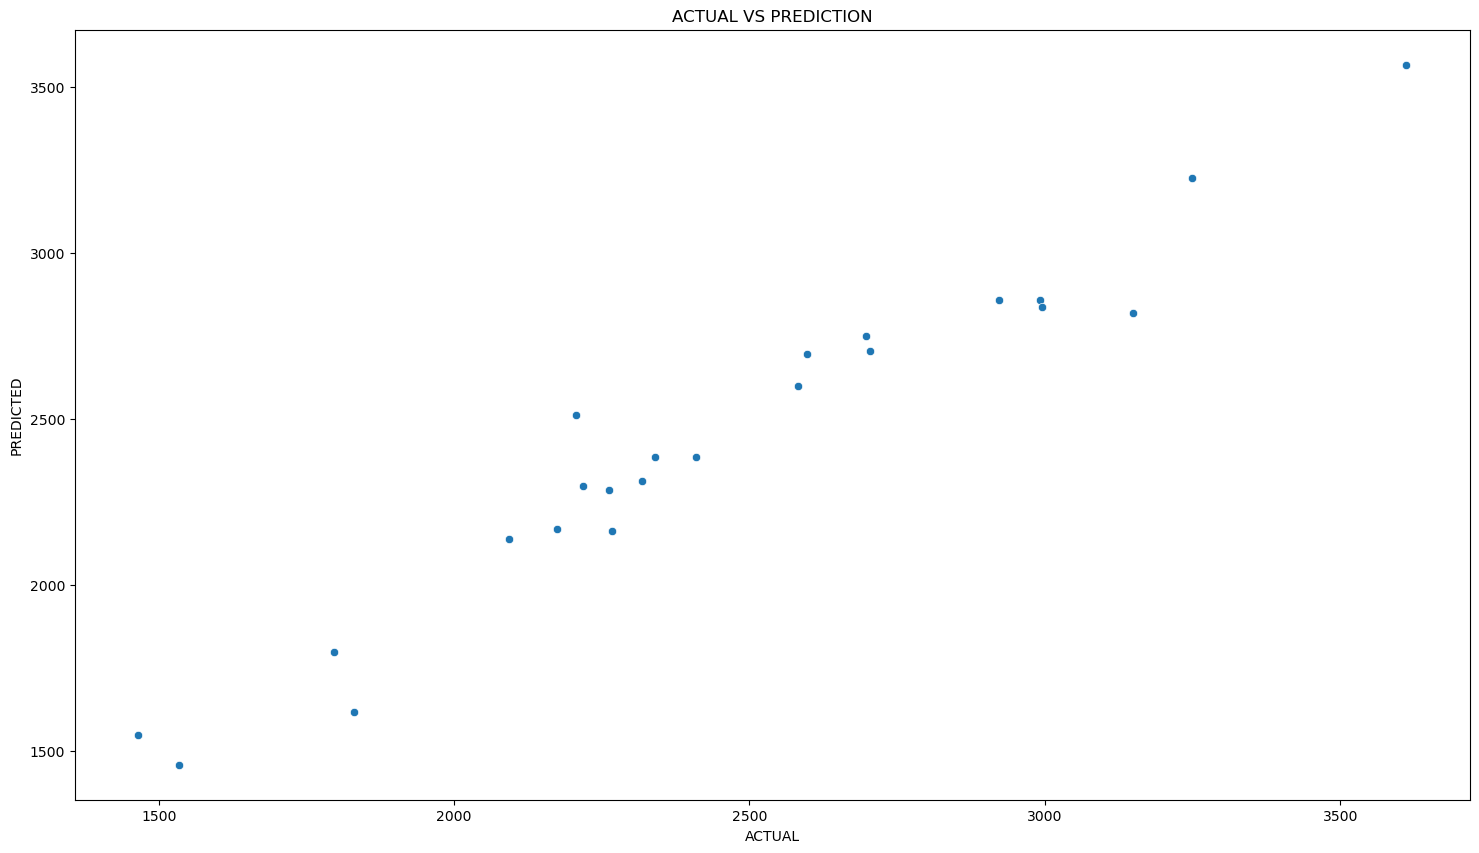

In [50]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='ACTUAL', y='PREDICTED', data=OUTPUT)
plt.title("ACTUAL VS PREDICTION")
plt.show()

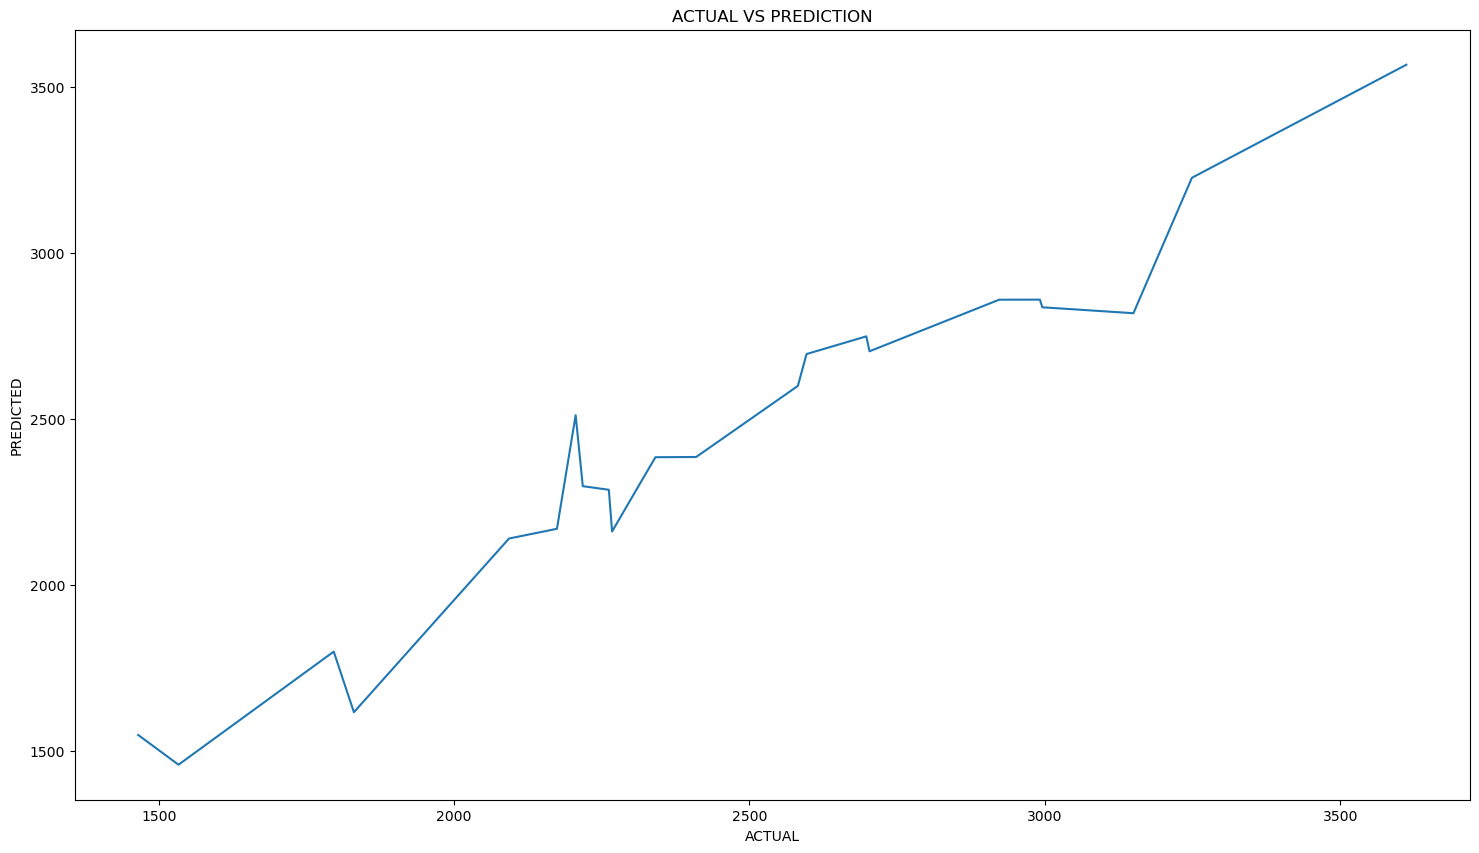

In [51]:
plt.figure(figsize=(18,10))
sns.lineplot(x='ACTUAL', y='PREDICTED', data=OUTPUT)
plt.title("ACTUAL VS PREDICTION")
plt.show()

In [52]:
lr=LinearRegression()

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [54]:
lr.fit(x_train, y_train)

LinearRegression()

In [55]:
print("model trained with {}".format(lr))
training_score = lr.score(x_train, y_train)*100
testing_score = lr.score(x_test, y_test)*100
score = r2_score(y_test, lr.predict(x_test))*100
mae = mean_absolute_error(y_test, lr.predict(x_test))
mse = mean_squared_error(y_test, lr.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

model trained with LinearRegression()
r2score:  86.31444004636218
training_score:  95.50626304369769
testing_score:  86.31444004636218
mae:  132.36086264303898
mse:  27809.91878643249
rmse_test:  166.76306181655605


In [56]:
y_pred = rd.predict(x)

In [57]:
OUTPUT2 = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
OUTPUT2

,ACTUAL,PREDICTED
0,2703.147501,2703.908863
1,3248.829251,3227.007993
2,2922.587952,2859.428900
3,2581.845035,2599.442665
4,2217.827004,2297.271362
5,1796.296296,1798.498332
6,2267.414680,2160.661794
7,3149.850253,2818.699520
8,3611.815169,3567.819389
9,2340.858889,2384.575885


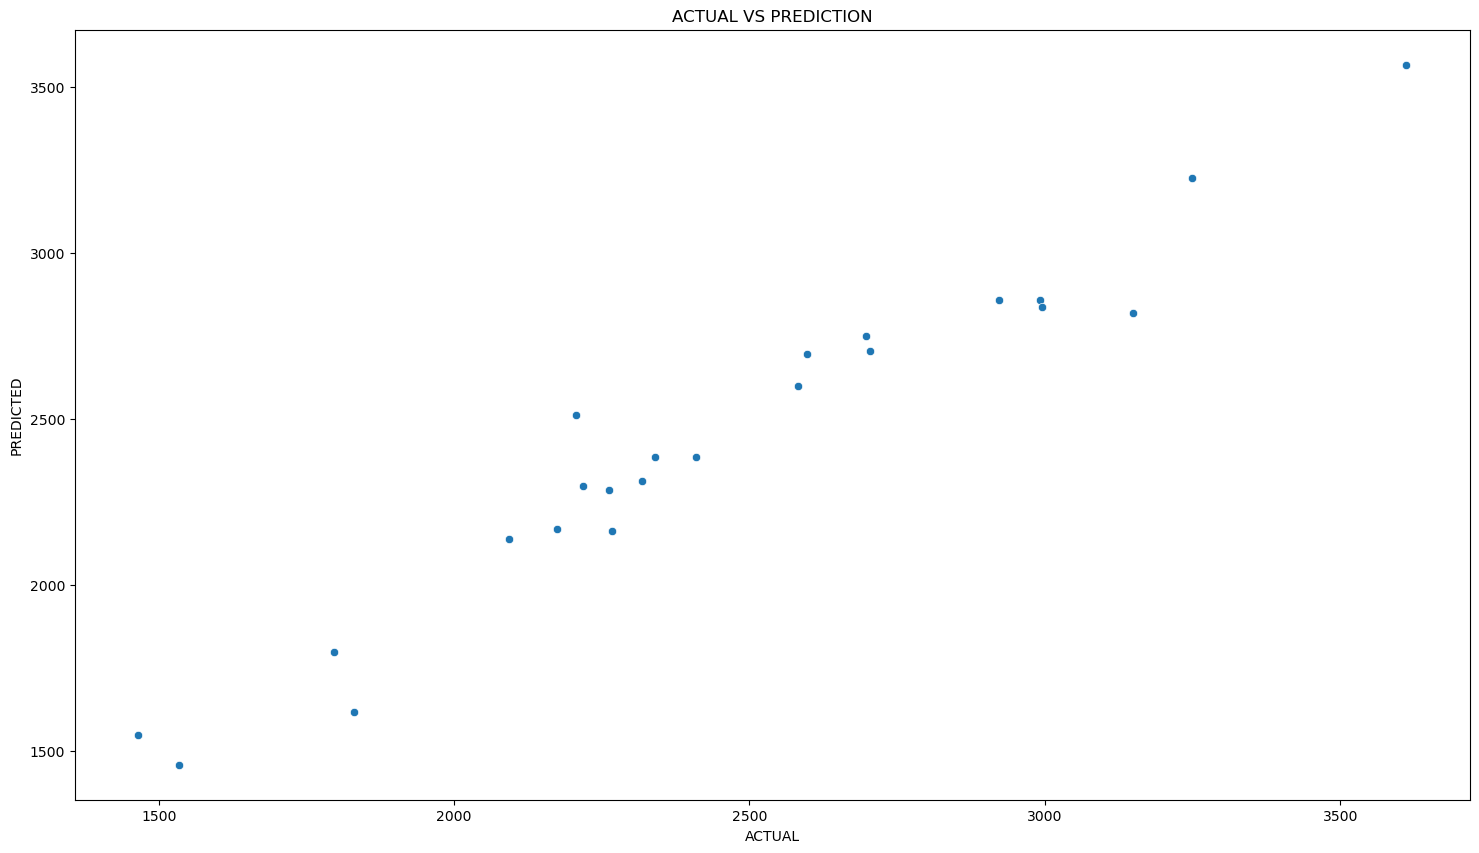

In [58]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='ACTUAL', y='PREDICTED', data=OUTPUT)
plt.title("ACTUAL VS PREDICTION")
plt.show()

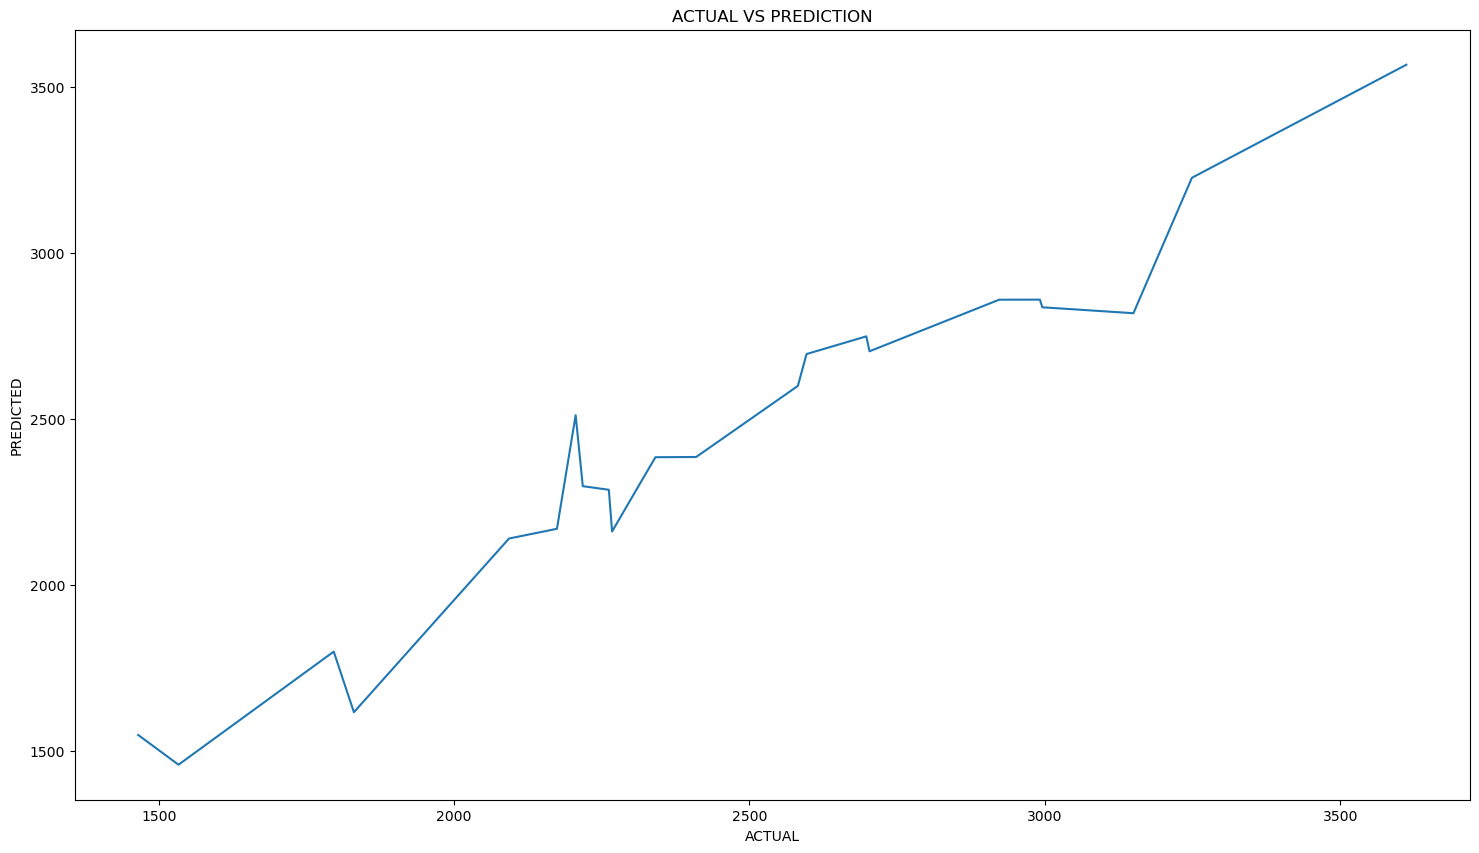

In [59]:
plt.figure(figsize=(18,10))
sns.lineplot(x='ACTUAL', y='PREDICTED', data=OUTPUT)
plt.title("ACTUAL VS PREDICTION")
plt.show()